#📌 Extracción

In [22]:
import json #Para procesar los archivos .json
import os
import pandas as pd
import numpy as np
import requests

In [23]:
url = "https://raw.githubusercontent.com/mateo16dev/Challenge-Telecom-X---Alura/refs/heads/main/Archivos%20Analisis/TelecomX_Data.json" #Ruta para el archivo Data
df = pd.read_json(url) #Transformandolo en un data frame de pandas

In [24]:
print(df.head()) #Visulizar el contendio del dataframe

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [25]:
url_dicc = "https://raw.githubusercontent.com/mateo16dev/Challenge-Telecom-X---Alura/refs/heads/main/Archivos%20Analisis/TelecomX_diccionario.md"
response = requests.get(url_dicc)

if response.status_code == 200:
    diccionario = response.text
    print(diccionario)
else:
    print("Error al descargar el diccionario:", response.status_code)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

#🔧 Transformación

##Conoce el conjunto de datos

In [26]:
# Extraer columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Combinar con las columnas principales
df_normalized = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                     customer_df, phone_df, internet_df, account_df], axis=1)

print(df_normalized.dtypes)
print(df_normalized.head())

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female      

##Comprobación de incoherencias en los datos

In [27]:
df_normalized['Charges.Total'] = pd.to_numeric(df_normalized['Charges.Total'], errors='coerce')
print(df_normalized.isnull().sum())
print(df_normalized.describe(include='all'))

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64
        customerID Churn gender  SeniorCitizen Partner Dependents  \
count         7267  7267   7267    7267.000000    7267       7267   
unique        7267     3      2            NaN       2          2   
top     9995-HOTOH    No   Male            NaN      No         No   
freq             1  5174   3675            NaN    3749       5086   
mean           NaN   NaN    NaN       0.162653     NaN        NaN   
std            NaN   NaN    NaN       0.369074     NaN        NaN   
min            NaN   

##Comprobar valores nulos

In [28]:
# --- 3. Chequear valores nulos ---
print(customer_df.isna().sum())
print(phone_df.isna().sum())
print(internet_df.isna().sum())
print(account_df.isna().sum())


gender           0
SeniorCitizen    0
Partner          0
Dependents       0
tenure           0
dtype: int64
PhoneService     0
MultipleLines    0
dtype: int64
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [29]:
customer_df.info()
phone_df.info()
internet_df.info()
account_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   

In [30]:
account_df["Charges.Total"] = pd.to_numeric(account_df["Charges.Total"], errors="coerce")
account_df["Charges.Total"].isna().sum()


np.int64(11)

In [31]:
# Reemplazar NaN por 0
account_df["Charges.Total"].fillna(0, inplace=True)

# Verificar
account_df["Charges.Total"].isna().sum()


/tmp/ipython-input-1149124788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  account_df["Charges.Total"].fillna(0, inplace=True)


np.int64(0)

## Fusión de los Dataframe

In [32]:
# Agregar 'customerID' a cada dataframe
customer_df['customerID'] = df['customerID']
account_df['customerID'] = df['customerID']
phone_df['customerID'] = df['customerID']
internet_df['customerID'] = df['customerID']

# combinación de dataframes
df = customer_df.merge(account_df, on="customerID", how="left")
df = df.merge(phone_df, on="customerID", how="left")
df = df.merge(internet_df, on="customerID", how="left")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   customerID        7267 non-null   object 
 6   Contract          7267 non-null   object 
 7   PaperlessBilling  7267 non-null   object 
 8   PaymentMethod     7267 non-null   object 
 9   Charges.Monthly   7267 non-null   float64
 10  Charges.Total     7267 non-null   float64
 11  PhoneService      7267 non-null   object 
 12  MultipleLines     7267 non-null   object 
 13  InternetService   7267 non-null   object 
 14  OnlineSecurity    7267 non-null   object 
 15  OnlineBackup      7267 non-null   object 
 16  DeviceProtection  7267 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,customerID,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Female,0,Yes,Yes,9,0002-ORFBO,One year,Yes,Mailed check,65.6,593.30,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,Male,0,No,No,9,0003-MKNFE,Month-to-month,No,Mailed check,59.9,542.40,Yes,Yes,DSL,No,No,No,No,No,Yes
2,Male,0,No,No,4,0004-TLHLJ,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,Male,1,Yes,No,13,0011-IGKFF,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Female,1,Yes,No,3,0013-EXCHZ,Month-to-month,Yes,Mailed check,83.9,267.40,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


## Creación columna de cuentas diarias

In [33]:
# Crear columna de cuenta diaria
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30

# Revisar resultado
df[["Charges.Monthly", "Cuentas_Diarias"]].head()


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga y análisis

## Estadísticas de variables numéricas

In [34]:
# Seleccionamos las columnas numéricas
num_cols = ["tenure", "SeniorCitizen", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

# Resumen estadístico básico
desc_num = df[num_cols].describe().T  # Transpuesta para mejor visualización

# Agregar mediana y rango
desc_num["median"] = df[num_cols].median()
desc_num["range"] = desc_num["max"] - desc_num["min"]

# Redondear para mejor lectura
desc_num = desc_num.round(2)

desc_num


,count,mean,std,min,25%,50%,75%,max,median,range
tenure,7267.0,32.35,24.57,0.00,9.00,29.00,55.00,72.00,29.00,72.00
SeniorCitizen,7267.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00,0.00,1.00
Charges.Monthly,7267.0,64.72,30.13,18.25,35.42,70.30,89.88,118.75,70.30,100.50
Charges.Total,7267.0,2277.18,2268.65,0.00,396.20,1389.20,3778.52,8684.80,1389.20,8684.80
Cuentas_Diarias,7267.0,2.16,1.00,0.61,1.18,2.34,3.00,3.96,2.34,3.35


## Variables categóricas

In [35]:
cat_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
            "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
            "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
            "PaperlessBilling", "PaymentMethod"]

for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).round(2))  # proporciones
    print("\n")


--- gender ---
gender
Male      3675
Female    3592
Name: count, dtype: int64
gender
Male      0.51
Female    0.49
Name: proportion, dtype: float64


--- Partner ---
Partner
No     3749
Yes    3518
Name: count, dtype: int64
Partner
No     0.52
Yes    0.48
Name: proportion, dtype: float64


--- Dependents ---
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
Dependents
No     0.7
Yes    0.3
Name: proportion, dtype: float64


--- PhoneService ---
PhoneService
Yes    6560
No      707
Name: count, dtype: int64
PhoneService
Yes    0.9
No     0.1
Name: proportion, dtype: float64


--- MultipleLines ---
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64
MultipleLines
No                  0.48
Yes                 0.42
No phone service    0.10
Name: proportion, dtype: float64


--- InternetService ---
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
InternetService
Fibe

## Distribución de la variable Churn (evasión)

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


/tmp/ipython-input-1015259433.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")


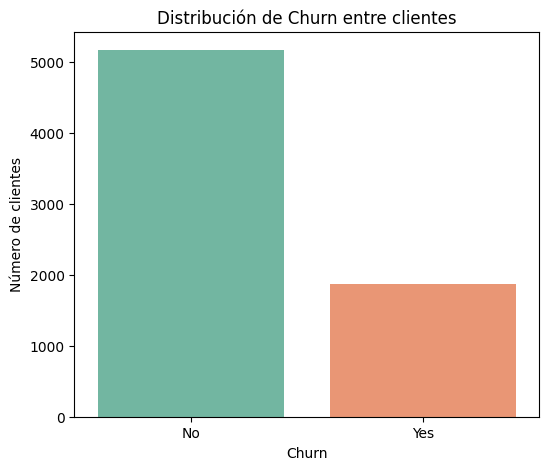

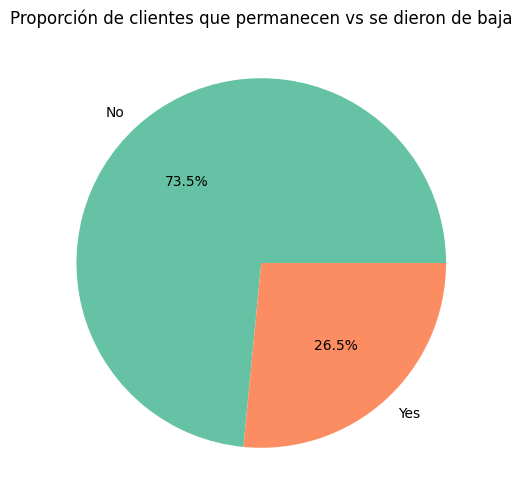

In [37]:
import matplotlib.pyplot as plt # biblioteca para vizualización de los datos
import seaborn as sns #Gráficos

# Agrega la columna 'Churn' de nuevo al dataframe df
df['Churn'] = df_normalized['Churn']

# Remover columnas vacias en 'Churn'
df = df[df['Churn'] != '']

# Conteo de clientes por Churn
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print(churn_counts)
print(churn_percent.round(2))

# Gráfico de barras
plt.figure(figsize=(6,5))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")
plt.title("Distribución de Churn entre clientes")
plt.ylabel("Número de clientes")
plt.xlabel("Churn")
plt.show()

#Pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=["#66c2a5","#fc8d62"])
plt.title("Proporción de clientes que permanecen vs se dieron de baja")
plt.show()

##Recuento de evasión por variables categóricas

In [38]:
cat_vars = ["gender", "Contract", "PaymentMethod", "Partner", "Dependents",
            "PhoneService", "InternetService"]

for col in cat_vars:
    print(f"--- Churn por {col} ---")
    ct = pd.crosstab(df[col], df["Churn"])
    ct_percent = pd.crosstab(df[col], df["Churn"], normalize="index") * 100  # proporción por fila
    print("Conteo:\n", ct)
    print("Proporción (%):\n", ct_percent.round(2))
    print("\n")


--- Churn por gender ---
Conteo:
 Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Proporción (%):
 Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16


--- Churn por Contract ---
Conteo:
 Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48
Proporción (%):
 Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


--- Churn por PaymentMethod ---
Conteo:
 Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Proporción (%):
 Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic

## Evasión por categoria

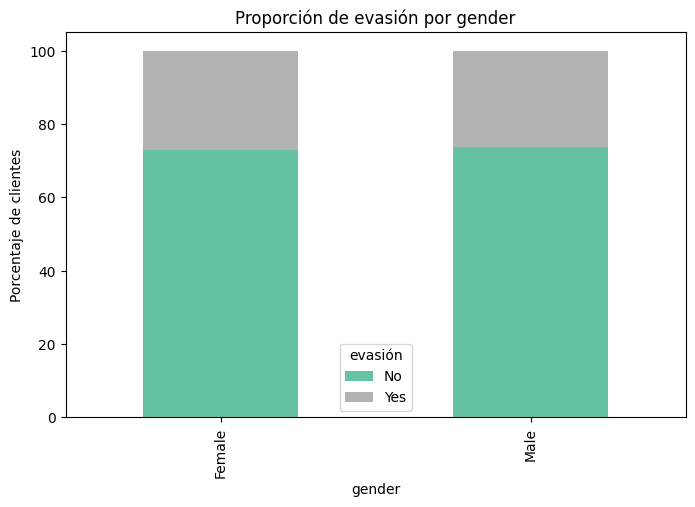

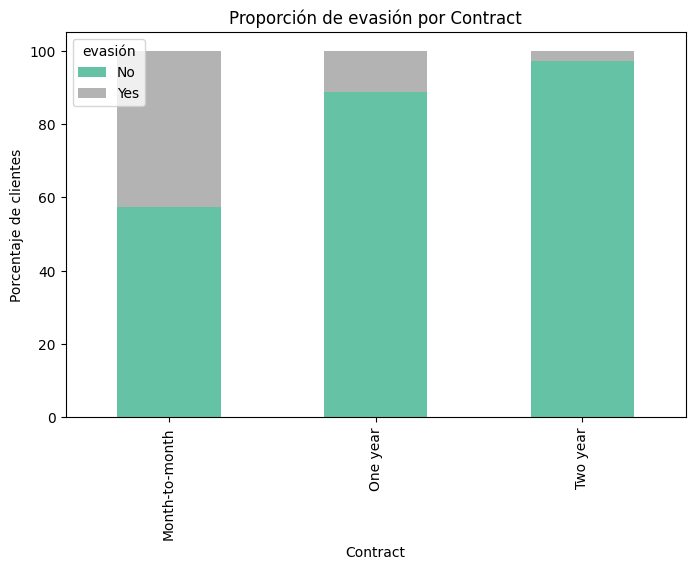

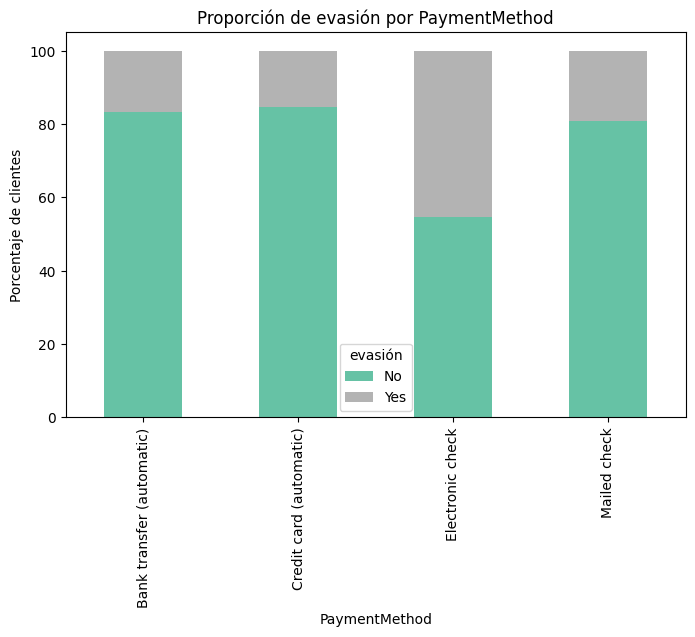

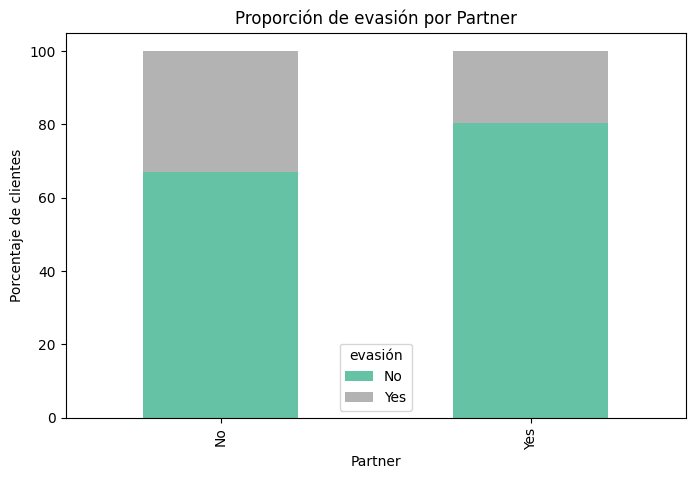

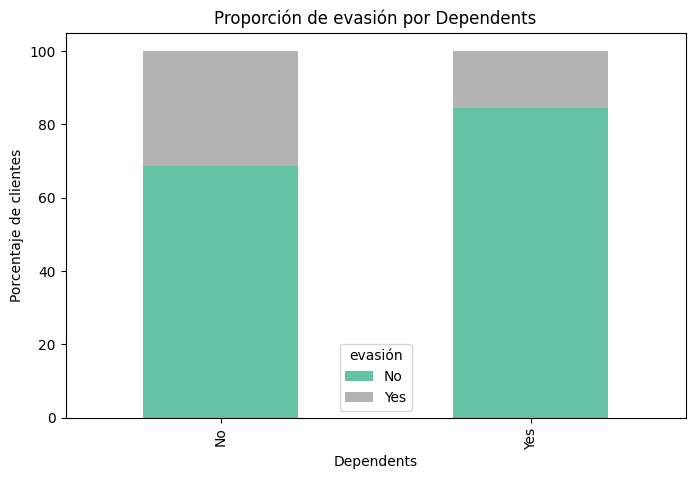

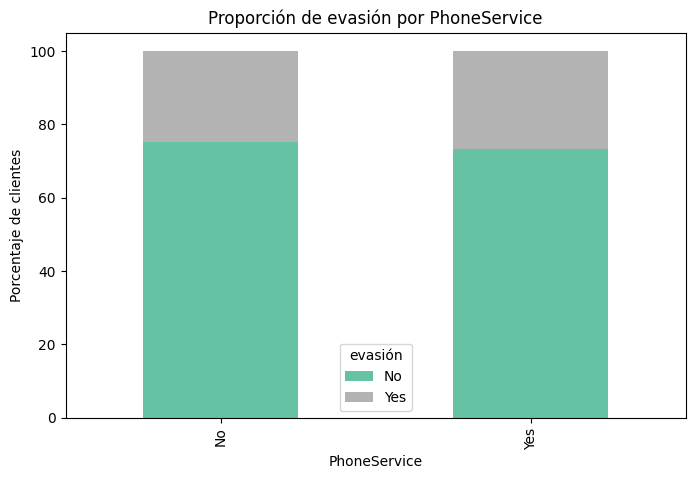

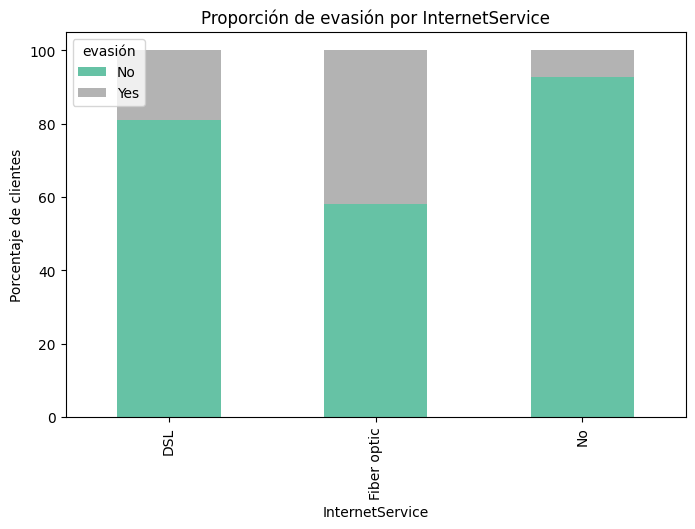

In [42]:
for col in cat_vars:
    ct_percent = pd.crosstab(df[col], df["Churn"], normalize="index") * 100
    ct_percent.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Set2")
    plt.title("Proporción de evasión por " + col)
    plt.ylabel("Porcentaje de clientes")
    plt.xlabel(col)
    plt.legend(title="evasión")
    plt.show()

In [43]:
num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

# Agrupar por Churn y calcular estadísticas básicas
desc_by_churn = df.groupby("Churn")[num_cols].describe().T  # Transpuesta para mejor visualización
desc_by_churn


Churn                           No          Yes
tenure          count  5174.000000  1869.000000
                mean     37.569965    17.979133
                std      24.113777    19.531123
                min       0.000000     1.000000
                25%      15.000000     2.000000
                50%      38.000000    10.000000
                75%      61.000000    29.000000
                max      72.000000    72.000000
Charges.Monthly count  5174.000000  1869.000000
                mean     61.265124    74.441332
                std      31.092648    24.666053
                min      18.250000    18.850000
                25%      25.100000    56.150000
                50%      64.425000    79.650000
                75%      88.400000    94.200000
                max     118.750000   118.350000
Charges.Total   count  5174.000000  1869.000000
                mean   2549.911442  1531.796094
                std    2329.954215  1890.822994
                min       0.000000    18.850000
                25%     572.900000   134.500000
                50%    1679.525000   703.550000
                75%    4262.850000  2331.300000
                max    8672.450000  8684.800000
Cuentas_Diarias count  5174.000000  1869.000000
                mean      2.042171     2.481378
                std       1.036422     0.822202
                min       0.608333     0.628333
                25%       0.836667     1.871667
                50%       2.147500     2.655000
                75%       2.946667     3.140000
                max       3.958333     3.945000

/tmp/ipython-input-1528218134.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")


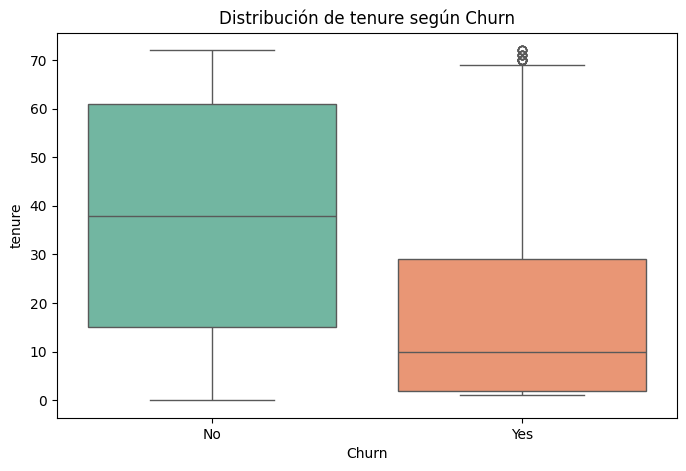

/tmp/ipython-input-1528218134.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")


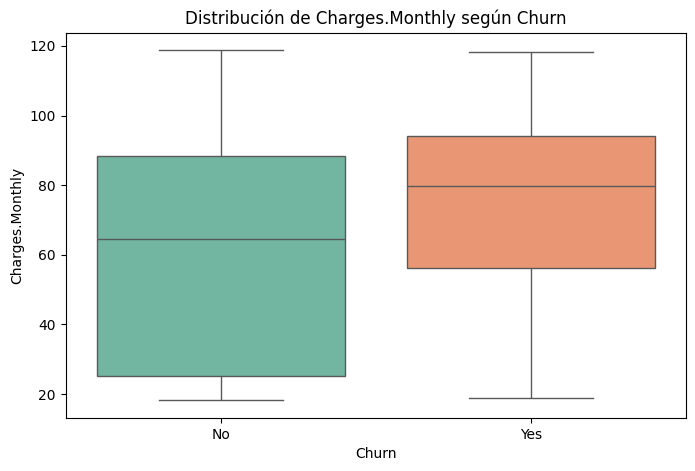

/tmp/ipython-input-1528218134.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")


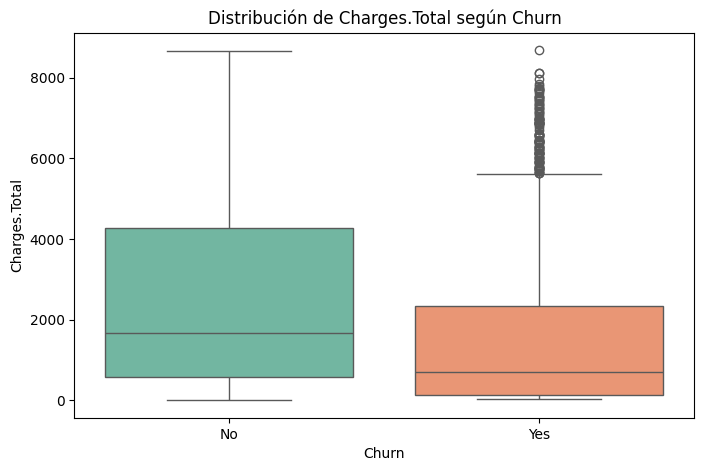

/tmp/ipython-input-1528218134.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2")


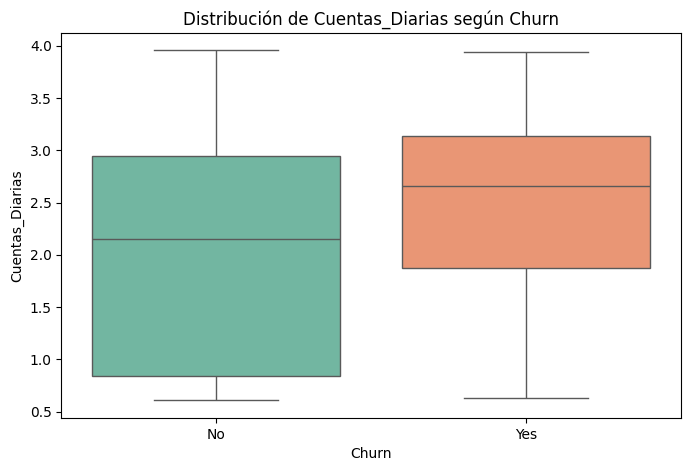

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Churn", y=col, data=df, palette="Set2")
    plt.title(f"Distribución de {col} según Churn")
    plt.show()


#📄Informe final

1️⃣ **Introducción**

El objetivo de este análisis es comprender el comportamiento de evasión de clientes (Churn) en la empresa de Telecom X.
Se busca identificar patrones de cancelación y cómo las características de los clientes (antigüedad, facturación, tipo de contrato, servicios contratados, etc.) influyen en la probabilidad de abandono.
Este análisis permitirá tomar decisiones estratégicas para reducir la evasión y mejorar la retención.

**2️⃣Limpieza y Tratamiento de Datos**

Pasos realizados:

1. Importación del dataset TelecomX_Data.json y normalización en cuatro     
* DataFrames:

* customers_df → información demográfica y de antigüedad.

* phone_df → servicios telefónicos contratados.

* internet_df → servicios de internet contratados.

* account_df → información de facturación y contratos.

2. Conversión de tipos de datos:

* Columnas numéricas (Charges.Monthly, Charges.Total) convertidas a float.

* Columnas categóricas aseguradas como object o category.

3. Tratamiento de valores nulos:

* Charges.Total con 11 registros nulos reemplazados por 0.

4. Creación de columna Cuentas_Diarias:

* Facturación mensual convertida a valor diario aproximado (Charges.Monthly / 30).

5. Consolidación de todos los DataFrames en un DataFrame maestro df mediante merge por customerID.

**3️⃣ Análisis Exploratorio de Datos**

3.1 Distribución de Churn

/tmp/ipython-input-1197213599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")


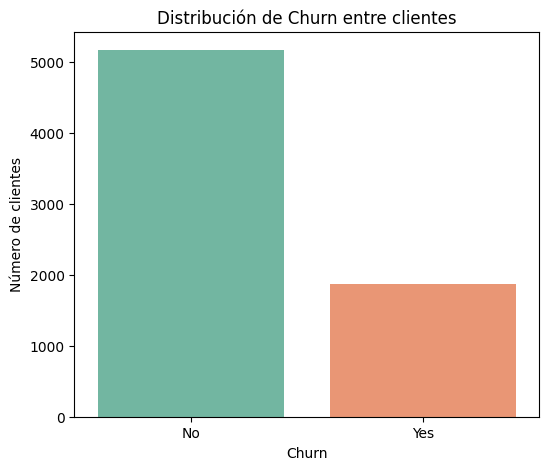

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")
plt.title("Distribución de Churn entre clientes")
plt.ylabel("Número de clientes")
plt.xlabel("Churn")
plt.show()


*   Aproximadamente 73% de los clientes permanecen y 27% se dieron de baja.

3.2 Churn vs Variables categóricas

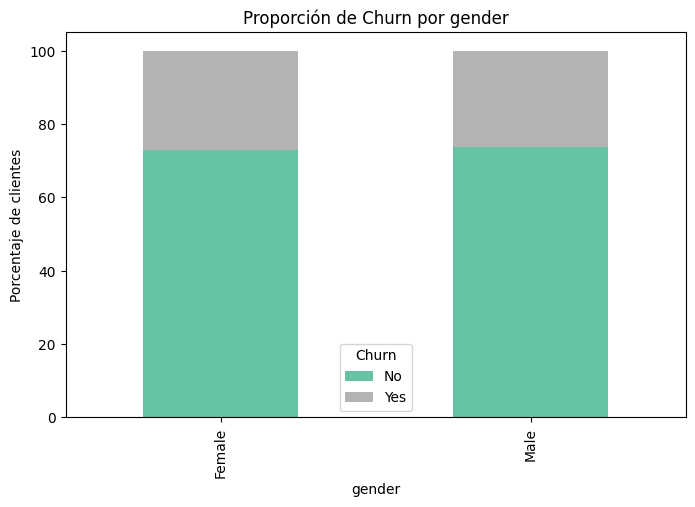

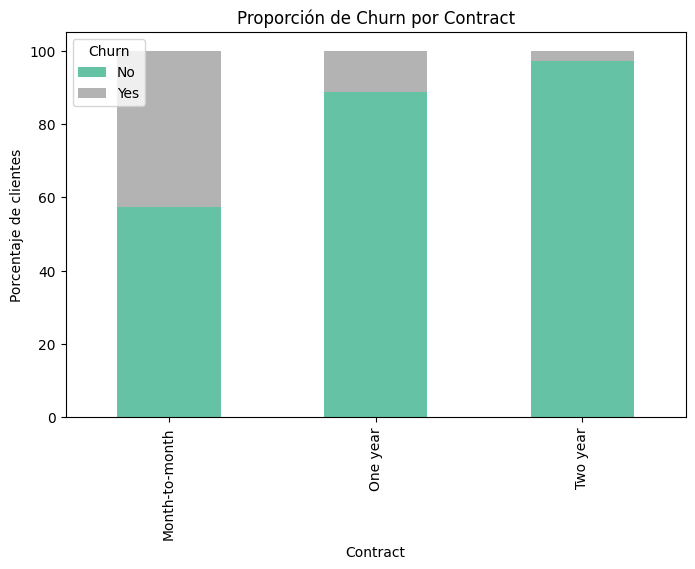

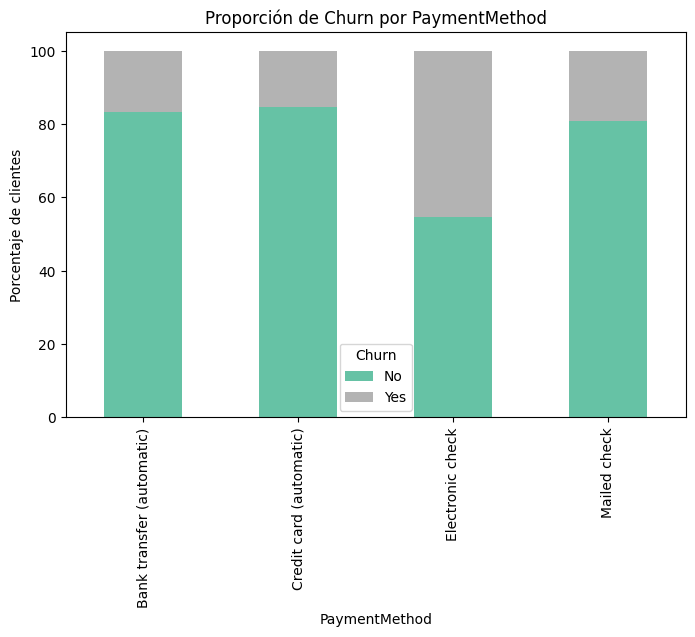

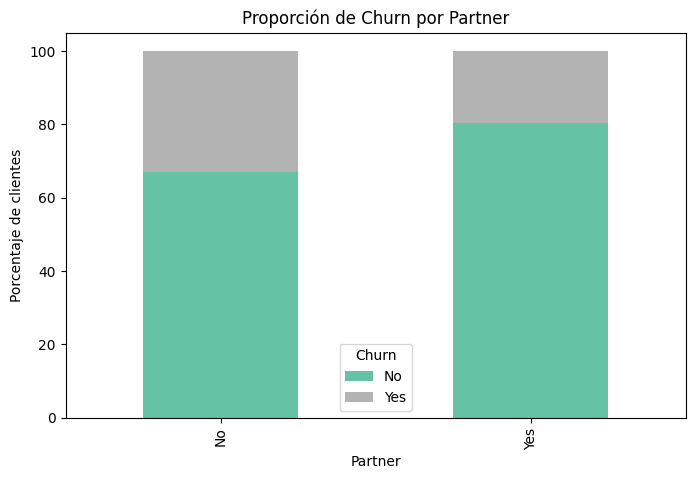

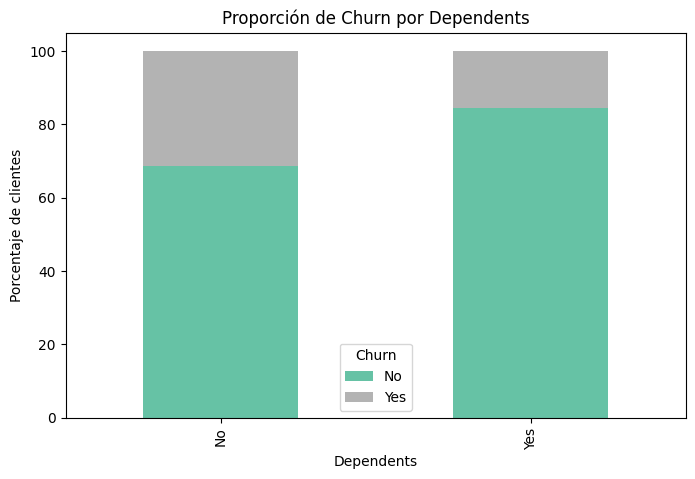

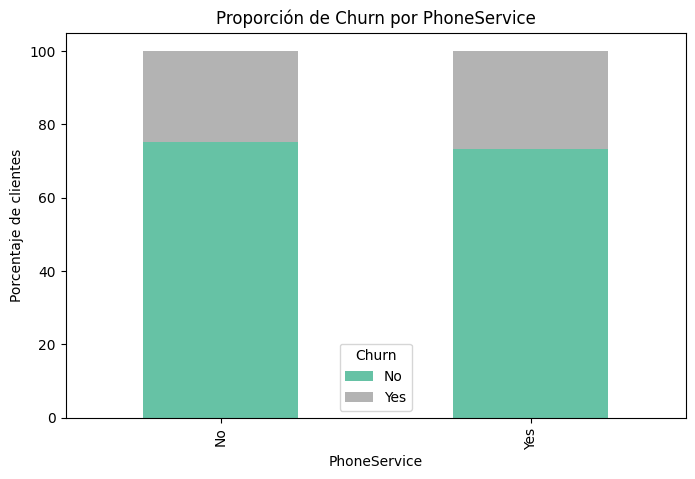

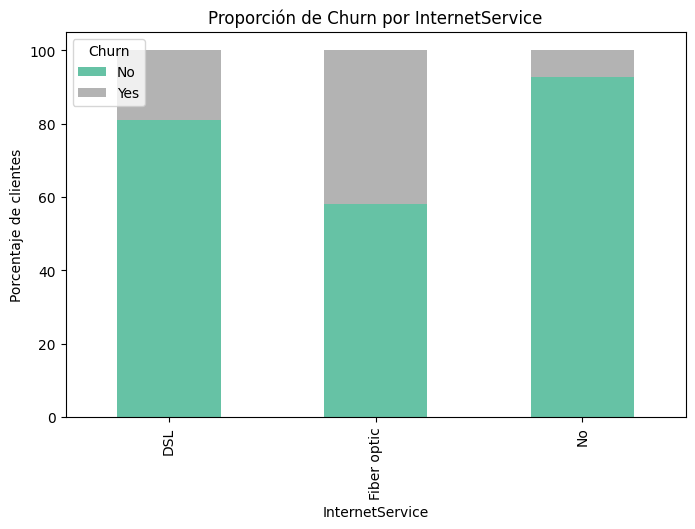

In [47]:
cat_vars = ["gender", "Contract", "PaymentMethod", "Partner", "Dependents",
            "PhoneService", "InternetService"]

for col in cat_vars:
    ct_percent = pd.crosstab(df[col], df["Churn"], normalize="index") * 100
    ct_percent.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Set2")
    plt.title("Proporción de Churn por " + col)
    plt.ylabel("Porcentaje de clientes")
    plt.xlabel(col)
    plt.legend(title="Churn")
    plt.show()


*  Clientes con contratos más cortos o pagos mensuales por tarjeta electrónica muestran mayor probabilidad de abandono.

3.3 Churn vs Variables numéricas

/tmp/ipython-input-970186644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y=col, data=df, palette="Set2", inner="quartile")


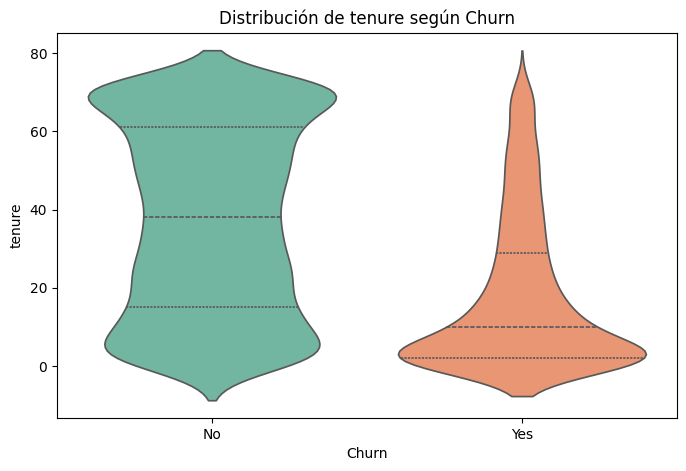

/tmp/ipython-input-970186644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y=col, data=df, palette="Set2", inner="quartile")


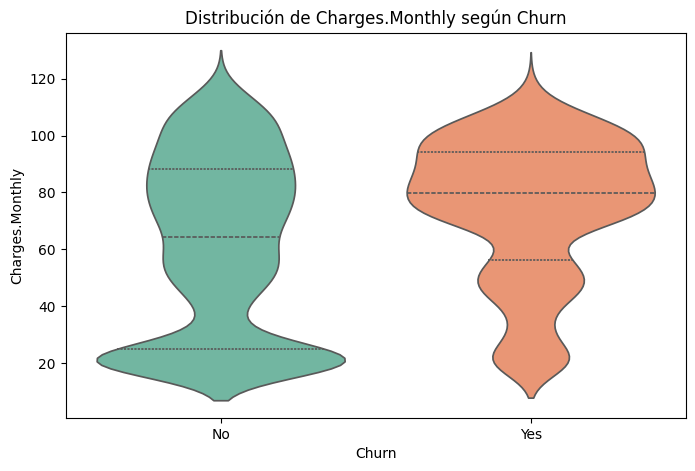

/tmp/ipython-input-970186644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y=col, data=df, palette="Set2", inner="quartile")


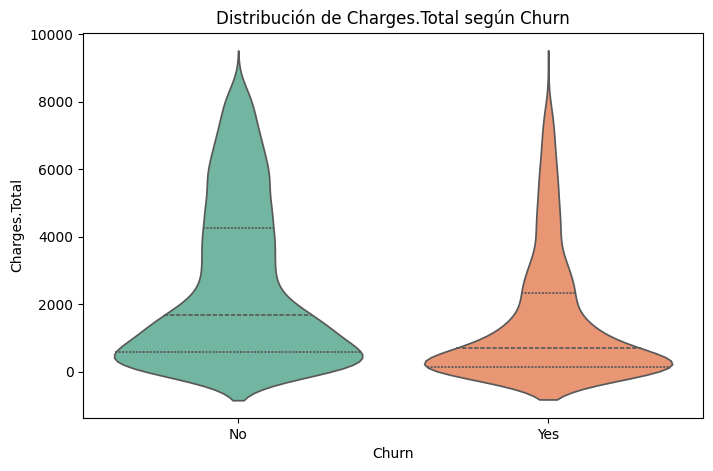

/tmp/ipython-input-970186644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y=col, data=df, palette="Set2", inner="quartile")


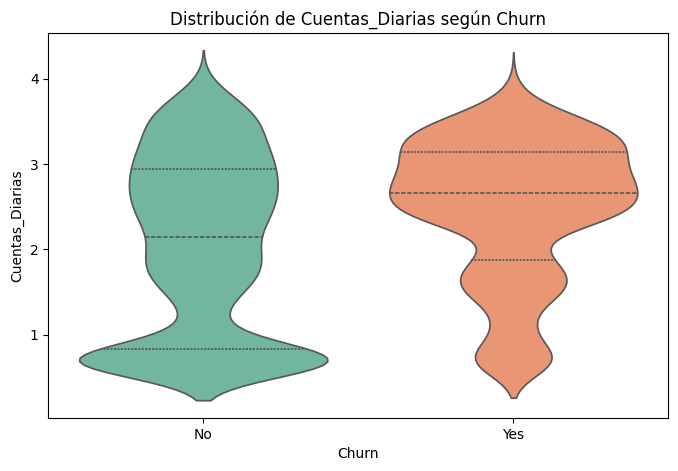

In [48]:
num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.violinplot(x="Churn", y=col, data=df, palette="Set2", inner="quartile")
    plt.title(f"Distribución de {col} según Churn")
    plt.show()


* Tenure: Clientes que se dan de baja suelen ser nuevos (media ≈ 18 meses vs 38 meses).

* Charges.Monthly: Clientes con facturación mensual más alta tienen mayor churn.

* Charges.Total: Clientes que permanecen acumulan mayor facturación total.

* Cuentas_Diarias: Mayor gasto diario correlaciona con mayor probabilidad de cancelación.

**4️⃣ Conclusiones e Insights**

Los clientes nuevos y con contratos de corto plazo tienen mayor riesgo de abandono.

Facturación mensual alta aumenta la probabilidad de evasión, aunque la facturación total suele ser menor por menor permanencia.

La antigüedad es un factor crítico: clientes de largo plazo permanecen incluso con pagos diarios altos.

La combinación de alto costo percibido y bajo tiempo de permanencia es un indicador fuerte de evasión.

**5️⃣ Recomendaciones Estratégicas**

Retención temprana: Incentivos, descuentos o planes adaptados para clientes nuevos con tarifas altas.

Segmentación de clientes: Identificar clientes con alto gasto diario y baja antigüedad para acciones de fidelización.

Optimización de planes: Ajustar precios y paquetes de servicios que reduzcan la percepción de sobrecosto.

Monitoreo continuo: Generar dashboards periódicos para detectar patrones de churn emergentes y actuar proactivamente.